# Ensemble Learning Project

The dataset is NYC Taxi Trip dataset.This dataset contains information about the
taxi trips that took place in different parts of New York City and how much time did that trip take
to complete.

Building the following predictive models: KNN, Linear Model, Random Forest and Gradient Boosting Model. Then ensembling the predictions of each model.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# loading the dataset
data = pd.read_csv('F:\\Python\\Ensemble learning(Course 5)\\Course 5 Project\\nyc_taxi_trip_duration Dataset.csv')

In [3]:
# first five rows of the dataset
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848


In [4]:
# shape of the dataset
data.shape

(729322, 11)

In [5]:
# checking for missing values
data.isna().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

No missing values present

In [6]:
# checking the datatypes
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

In [7]:
# Dropping the id variable
data = data.drop(['id'], axis=1)

Since the id variable doesnot provide any valueable insights it is dropped from the dataset.

In [8]:
# converting strings to datetime features
data['pickup_datetime'] = pd.to_datetime(data.pickup_datetime)
data['dropoff_datetime'] = pd.to_datetime(data.dropoff_datetime)

# converting yes/no flag to 1 and 0
data['store_and_fwd_flag'] = 1 * (data.store_and_fwd_flag == 'Y')

In [9]:
# extracting new columns from pickup_datetime

# day of week of pickup
data['pickup_dow'] = data['pickup_datetime'].dt.weekday

# month of year of pickup
data['pickup_month'] = data['pickup_datetime'].dt.month

# hour of day of pickup
data['pickup_hour'] = data['pickup_datetime'].dt.hour

In [10]:
# dropping the datetime variables
data = data.drop(['pickup_datetime', 'dropoff_datetime'], axis=1)

In [11]:
# creating a function to calculate haversine_distance
def haversine_vectorize(lon1, lat1, lon2, lat2):

    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    newlon = lon2 - lon1
    newlat = lat2 - lat1

    haver_formula = np.sin(newlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(newlon/2.0)**2

    dist = 2 * np.arcsin(np.sqrt(haver_formula ))
    km = 6367 * dist #6367 for distance in KM for miles use 3958
    return km

In [12]:
data['distance'] = haversine_vectorize(data['pickup_longitude'],data['pickup_latitude'],data['dropoff_longitude'],data['dropoff_latitude'])

In [13]:
# dropping the latitudes and longitudes
#data = data.drop(['pickup_latitude', 'dropoff_latitude', 'pickup_longitude', 'dropoff_longitude'], axis=1) 

In [14]:
# checking the datatypes again
data.dtypes

vendor_id               int64
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag      int32
trip_duration           int64
pickup_dow              int64
pickup_month            int64
pickup_hour             int64
distance              float64
dtype: object

# Building a KNN model

In [15]:
# Seperating the dependent and independent variables
x = data.drop(['trip_duration'], axis=1)
y = data['trip_duration']

x.shape, y.shape

((729322, 11), (729322,))

In [16]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [17]:
x = pd.DataFrame(x_scaled,columns=x.columns)

In [18]:
x.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_dow,pickup_month,pickup_hour,distance
0,0.931533,-0.504444,0.280911,0.832127,0.137198,0.538014,-0.074634,-1.560057,-0.903461,0.373006,-0.515047
1,-1.073500,0.257493,-0.212156,-0.570815,-0.306500,-1.577382,-0.074634,0.486536,-0.308456,1.466269,0.158041
2,0.931533,0.257493,-0.341220,-0.876953,0.364913,0.642175,-0.074634,1.509832,-0.903461,0.529187,0.875144
3,0.931533,3.305240,0.169785,0.261980,0.239160,0.800639,-0.074634,-1.048408,-1.498465,-0.720257,-0.248107
4,-1.073500,-0.504444,-0.625160,-1.263600,-0.212103,-0.309245,-0.074634,-0.536760,-0.903461,-1.188799,0.203852


In [19]:
# importing the train test split function
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,random_state=56)

In [20]:
print('Training dataset: ',train_x.shape,train_y.shape)
print('Test dataset: ',test_x.shape,test_y.shape)

Training dataset:  (546991, 11) (546991,)
Test dataset:  (182331, 11) (182331,)


In [21]:
# importing KNN regressor
from sklearn.neighbors import KNeighborsRegressor

In [22]:
# creating instance of KNNR
knn = KNeighborsRegressor(n_neighbors=5, n_jobs=-1)

# Fitting the model
knn.fit(train_x,train_y)

KNeighborsRegressor(n_jobs=-1)

In [23]:
# importing r2 score
from sklearn.metrics import r2_score

In [25]:

# score of the model on the test set
test_predict = knn.predict(test_x)
k = r2_score(test_y, test_predict)

print('Test r2 score ',k)

Test r2 score  -0.24530256012972518


The r2 score on the test set is negative that means our model is performing very poorly.

In [26]:
# Elbow for regression
def Elbow(K):
    test_score = []
    
    # training model for every value of K
    for i in K:
        knn = KNeighborsRegressor(n_neighbors=i, n_jobs=-1)
        knn.fit(train_x,train_y)
        
        test_predict = knn.predict(test_x)
        tmp = r2_score(test_y,test_predict)
        test_score.append(tmp)
    
    return test_score

In [27]:
k = range(1,50,4)

In [28]:
test = Elbow(k)

Text(0.5, 1.0, 'Elbow curve for Test')

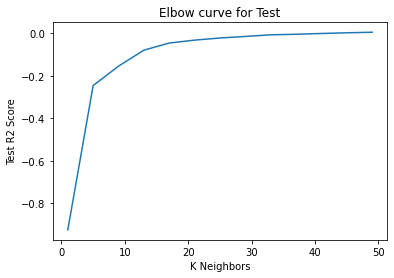

In [29]:
# plotting the curves
plt.plot(k,test)
plt.xlabel('K Neighbors')
plt.ylabel('Test R2 Score')
plt.title('Elbow curve for Test')

The score is best at k=10.

In [30]:
# creating instance of KNNR
knn = KNeighborsRegressor(n_neighbors=10, n_jobs=-1)

# Fitting the model
knn.fit(train_x,train_y)

KNeighborsRegressor(n_jobs=-1, n_neighbors=10)

In [31]:
# predicting over the train set
M1_train = knn.predict(train_x)
train_score = r2_score(train_y, M1_train)

# predicting over the test set
M1_test = knn.predict(test_x)
test_score = r2_score(test_y, M1_test)

print(train_score, test_score)

0.1317344886191285 -0.12697445401182406


# Building a Linear model

In [32]:
# segregating dependent and independent variables
x = data.drop(['trip_duration'],axis=1)
y = data['trip_duration']

In [33]:
# creating train and test set
train_x, test_x , train_y, test_y = train_test_split(x,y,random_state=101)

In [34]:
from sklearn.linear_model import LinearRegression as LR

In [35]:
# creating instance of Linear regression
lr = LR(normalize=True)

# fitting the model
lr.fit(train_x,train_y)

LinearRegression(normalize=True)

In [36]:
# predicting over the train set
train_predict = lr.predict(train_x)
k = r2_score(train_y, train_predict)
print('Training score: ',k)

Training score:  0.02428534051049569


In [37]:
# predicting over the test set
test_predict = lr.predict(test_x)
k = r2_score(test_y, test_predict)
print('Test score: ',k)

Test score:  0.010144212224132754


In [38]:
# performing lasso regularization
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha = 0.01 , normalize = True , max_iter = 1000 , tol = 0.00001)
lasso_reg.fit(train_x , train_y)

Lasso(alpha=0.01, normalize=True, tol=1e-05)

In [39]:
train_predict = lasso_reg.predict(train_x)
k = r2_score(train_y, train_predict)
print('Train score with lasso regularization:' , k)

Train score with lasso regularization: 0.02424018738511835


In [40]:
test_predict = lasso_reg.predict(test_x)
k = r2_score(test_y, test_predict)
print('Test score with lasso regularization: ' , k)

Test score with lasso regularization:  0.01010109542763793


In [41]:
M2_train = train_predict
M2_test = test_predict

# Building Random Forest model

In [42]:
# Seperating the dependent and independent variables
x = data.drop(['trip_duration'], axis=1)
y = data['trip_duration']

x.shape, y.shape

((729322, 11), (729322,))

In [43]:
# importing the train test split function
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=56)

In [44]:
# importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

In [45]:
# creating an instance of RandomForestRegressor
reg = RandomForestRegressor(n_estimators=100, max_depth=10, n_jobs=-1)

In [46]:
# fitting the model
reg.fit(train_x, train_y)

RandomForestRegressor(max_depth=10, n_jobs=-1)

In [47]:
test_predict = reg.predict(test_x)

In [48]:
r2_score(test_y, test_predict)

0.00323885560783832

In [49]:
# implementing random search
from sklearn.model_selection import RandomizedSearchCV

In [50]:
parameter_grid = {
    'n_estimators': [70,80,90,100,110,120,130],
    'max_depth': [4,5,6,7,8,9,11],
    'max_features': [0.3,0.5,0.7,0.9],
    'min_samples_split' :[100,250,500,750,1000]
}

In [51]:
randomsearch = RandomizedSearchCV(estimator=reg, param_distributions=parameter_grid, n_iter=15, cv=5,n_jobs=-1)

In [52]:
randomsearch.fit(train_x, train_y)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=10, n_jobs=-1),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [4, 5, 6, 7, 8, 9, 11],
                                        'max_features': [0.3, 0.5, 0.7, 0.9],
                                        'min_samples_split': [100, 250, 500,
                                                              750, 1000],
                                        'n_estimators': [70, 80, 90, 100, 110,
                                                         120, 130]})

In [53]:
# best combination of hyperparameter
randomsearch.best_params_

{'n_estimators': 80,
 'min_samples_split': 1000,
 'max_features': 0.5,
 'max_depth': 11}

In [54]:
# creating an instance of RandomForestRegressor with new hyperparameters
reg = RandomForestRegressor(n_estimators=70, max_depth=11, min_samples_split=1000, max_features=0.5, n_jobs=-1)

In [55]:
# fitting the model
reg.fit(train_x, train_y)

RandomForestRegressor(max_depth=11, max_features=0.5, min_samples_split=1000,
                      n_estimators=70, n_jobs=-1)

In [56]:
# predicting for train set
M3_train = reg.predict(train_x)
train_score = r2_score(train_y, M3_train)
print(train_score)

0.06681261429746044


In [57]:
# predicting for test set
M3_test = reg.predict(test_x)
test_score = r2_score(test_y, M3_test)
print(test_score)

0.03383348957273469


# Building Gradient Boosting Model

In [58]:
# Seperating the dependent and independent variables
x = data.drop(['trip_duration'], axis=1)
y = data['trip_duration']

x.shape, y.shape

((729322, 11), (729322,))

In [59]:
train_x, test_x, train_y, test_y = train_test_split(x, y, random_state=56)

In [60]:
# Building GBDT model
from sklearn.ensemble import GradientBoostingRegressor

In [61]:
# creating instance
reg = GradientBoostingRegressor(random_state=96)

In [62]:
# fitting the model
reg.fit(train_x, train_y)

GradientBoostingRegressor(random_state=96)

In [63]:
test_predict = reg.predict(test_x)

In [64]:
r2_score(test_y, test_predict)

-0.4744498562810462

In [65]:
parameter_grid = {
    'n_estimators': [70,80,90,100,110,120,130],
    'max_depth': [4,5,6,7,8,9,11],
    'max_features': [0.3,0.5,0.7,0.9],
    'min_samples_split' :[100,250,500,750,1000]
}

In [66]:
randomsearch = RandomizedSearchCV(estimator=reg, param_distributions=parameter_grid, n_iter=15, cv=5,n_jobs=-1)

In [67]:
randomsearch.fit(train_x, train_y)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=96),
                   n_iter=15, n_jobs=-1,
                   param_distributions={'max_depth': [4, 5, 6, 7, 8, 9, 11],
                                        'max_features': [0.3, 0.5, 0.7, 0.9],
                                        'min_samples_split': [100, 250, 500,
                                                              750, 1000],
                                        'n_estimators': [70, 80, 90, 100, 110,
                                                         120, 130]})

In [68]:
# best combination of hyperparameter
randomsearch.best_params_

{'n_estimators': 70,
 'min_samples_split': 100,
 'max_features': 0.7,
 'max_depth': 4}

In [69]:
# creating instance with new hyperparameters
reg = GradientBoostingRegressor(random_state=96, n_estimators=90, min_samples_split=750, max_features=0.3, max_depth=4)

In [70]:
# fitting the model
reg.fit(train_x, train_y)

GradientBoostingRegressor(max_depth=4, max_features=0.3, min_samples_split=750,
                          n_estimators=90, random_state=96)

In [71]:
# predicting for train set
M4_train = reg.predict(train_x)
train_score = r2_score(train_y, M4_train)
print(train_score)

0.29040810709159715


In [72]:
# predicting for test set
M4_test = reg.predict(test_x)
test_score = r2_score(test_y, M4_test)
print(test_score)

0.02334664855120816


# Performing weighted averaging

In [73]:
# Stacking model

# Creating a new train dataframe
train_prediction = {
    'KNN': M1_train,
    'LR': M2_train,
    'RF': M3_train,
    'GBM': M4_train
}
train_predictions = pd.DataFrame(train_prediction)
train_predictions.head()

,KNN,LR,RF,GBM
0,704.2,741.172174,935.685157,941.824276
1,513.1,757.213131,687.064259,581.063764
2,557.6,1014.037256,665.428158,696.481474
3,470.7,763.206138,345.893932,347.580179
4,520.1,750.042770,813.672046,963.100399


In [74]:
# creating a new test dataframe
test_prediction = {
    'KNN': M1_test,
    'LR': M2_test,
    'RF': M3_test,
    'GBM': M4_test
}
test_predictions = pd.DataFrame(test_prediction)
test_predictions.head()

,KNN,LR,RF,GBM
0,1975.0,663.461097,2589.631497,1559.337757
1,829.8,936.794838,1264.023314,1262.563100
2,285.6,887.935422,635.206762,645.947272
3,2767.4,1224.843630,2396.138134,1937.767748
4,426.0,858.223594,540.033939,599.348272


In [83]:
from statistics import mean
final_pred = np.array([])
for i in range (0, len(test_x)):
    # Giving more weight to model3 and model4 since they are better than model2
    final_pred = np.append(final_pred, mean([M1_test[i], M2_test[i], M3_test[i], M3_test[i], M3_test[i], M4_test[i], M4_test[i]]))

In [84]:
r2_score(test_y, final_pred)

0.02987630927009821

The final r2 score of the test set has improved.